# Problem Set 4



Team: 
    Lea Schmierer 3546563;
    Angelina Basova 3704658;
    Daniel Knorr 3727033

## Exercise 1


In [1]:
from IPython.display import IFrame
IFrame("Ex1.pdf", width=600, height=300)


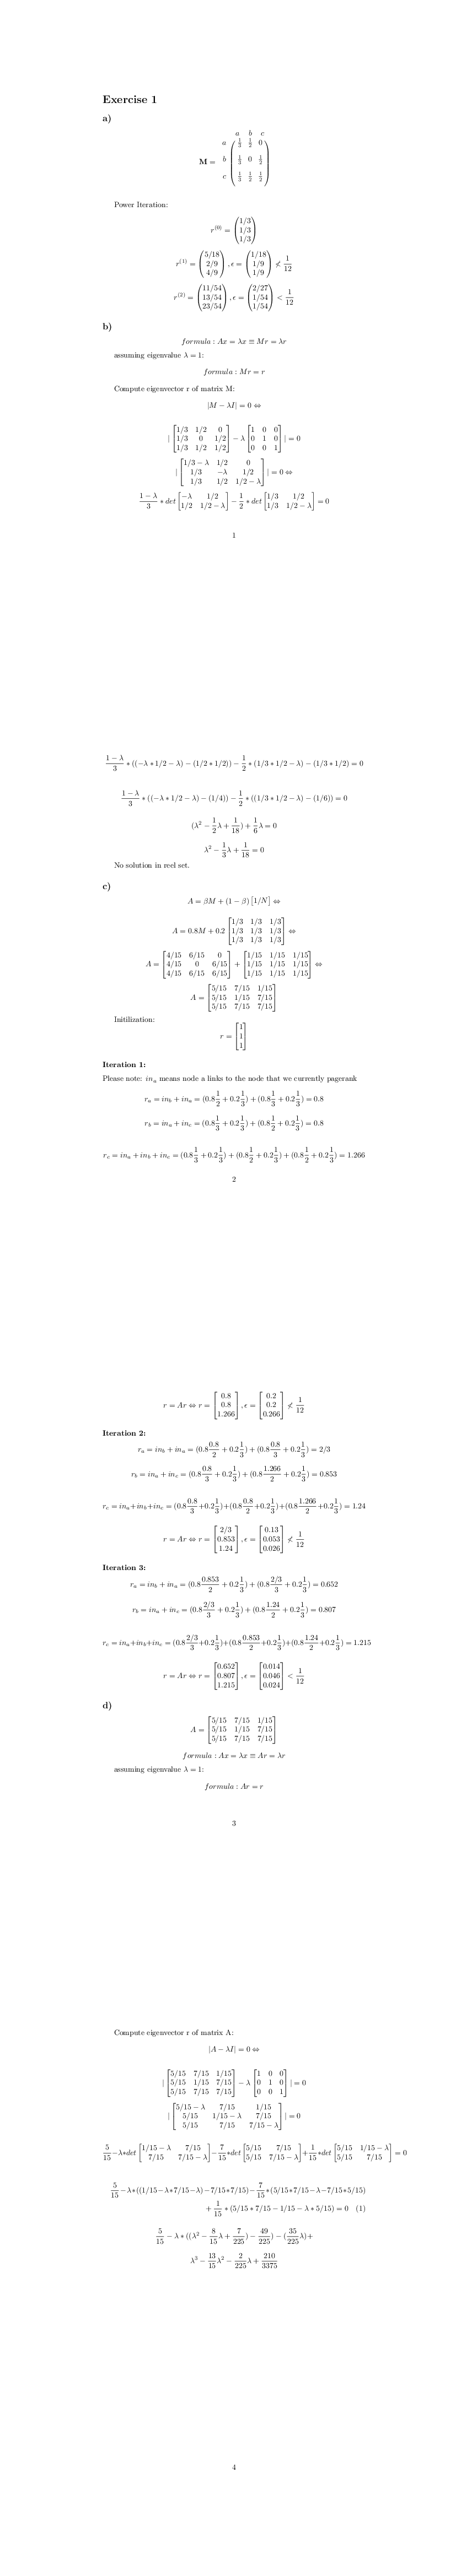

In [6]:
from wand.image import Image
imageFromPdf = Image(filename='Ex1.pdf', resolution=100)
pages = len(imageFromPdf.sequence)

image = Image(
    width=imageFromPdf.width,
    height=imageFromPdf.height * pages
)
for i in range(pages):
  image.composite(
      imageFromPdf.sequence[i],
      top=imageFromPdf.height * i,
      left=0
  )
image.format = "png"
image


## Exercise 2

#### a) Explain briefly why all nodes in the clique have the same PageRank value.

All nodes in the clique have the same value, because they all have the same number of in-links and out-links, therefore none of these nodes are more important than the others. Every note is weighted the same.



#### b) 

I have not a single idea why the assumption is not in the google formulation included. Based on the slides and my understanding the assumption that "we explicitly follow random teleport links with probability 1.0 from dead-ends" is integrated through the beta parameter and hence there should be no change needed in the 2nd matrix contributing to A.


#### c)


#### d) Explain briefly why random teleports not only solve the spider trap problem but also the dead ends problem. 

There are two approaches to dealing with dead ends: 
- We can drop the dead ends from the graph and their incoming arcs.
- We can modify the process by which random surfers are assumed to move about the web. This approach also resolves the problem of spider traps. It is also called taxation
    - Solution: The columns of a matrix M were made stochastic so that teleportation can always be done when there is nowhere else to go.
    -  We modify the calculation of Page Rank. We allow each random suffer a  probability (1-beta) of teleporting to a random page, rather than following an out-link from their current page (beta). This prevents an infinite loop for spider traps and for dead ends 


No dead ends: 
- the probability of introducing a new random surfer = the probability that the random surfer will decide not to follow a link from their current page

With dead ends:
- surfer goes nowhere. Since the term (1 − )e/n does not depend on the sum of the components of the vector v, there will always be some fraction of a surfer operating on the Web. That is, when there are dead ends, the sum of the components of v (pagerank) may be less than 1, but it will never reach 0."


## Exercise 3

In [75]:
import numpy as np


######################
# 3a)
print("Exercise 3a)")
######################


# return matrix A
def get_google_matrix(M, beta):
    scalar = np.ones(shape=M.shape) * 1 / M.shape[0]
    A = beta * M + (1-beta) * scalar 
    return A

def can_terminate(difference, epsilon):
    return np.all(difference < epsilon)


def calculatePageRank(M, beta, epsilon):
    pagerank = []

    A = get_google_matrix(M, beta)

    # init rank r
    num_nodes = M.shape[0]
    # r_0
    old_r = np.full((num_nodes, 1), 1/num_nodes)

    count = 0

    while True:
        new_r = np.dot(A, old_r)
        difference = np.abs(new_r - old_r)
        old_r = new_r

        count +=1

        # if termination criterion fulfilled stop power iteration
        if can_terminate(difference, epsilon):
            pagerank = new_r
            break

    print()
    print(f"Number of iterations: {count}")
    return pagerank


if __name__ == "__main__":
    matrix = np.matrix([[1/2, 1/2,0],[1/2, 0,0], [0, 1/2, 1]])
    print("Matrix M:")
    print(matrix)
    
    pagerank = calculatePageRank(matrix, 0.8, 0.001 )
    print()
    print("Pagerank results:")
    print(pagerank)
    
   

Exercise 3a)
Matrix M:
[[0.5 0.5 0. ]
 [0.5 0.  0. ]
 [0.  0.5 1. ]]

Number of iterations: 12

Pagerank results:
[[0.2130343 ]
 [0.15207948]
 [0.63488622]]


In [88]:
######################
# 3b)
print("Exercise 3b)")
######################

def generate_matrix(n:int):
    M = np.full((n, n), 1/(n-1))
    np.fill_diagonal(M, 0)

    return M


if __name__ == "__main__":
    print()
    M_4 = generate_matrix(4)
    print("Clique with 4 nodes")
    print(M_4)
    pagerank_4 = calculatePageRank(M_4, 0.8, 1/12)
    print("Pagerank")
    print(pagerank_4)

    print("-------------------------------------------------------------------")
    print("-------------------------------------------------------------------")


    print()
    print("Clique with 6 nodes")
    M_6 = generate_matrix(6)
    print(M_6)
    pagerank_6 = calculatePageRank(M_6, 0.8, 1/12)
    print("Pagerank")
    print(pagerank_4)


Exercise 3b)

Clique with 4 nodes
[[0.         0.33333333 0.33333333 0.33333333]
 [0.33333333 0.         0.33333333 0.33333333]
 [0.33333333 0.33333333 0.         0.33333333]
 [0.33333333 0.33333333 0.33333333 0.        ]]

Number of iterations: 1
Pagerank
[[0.25]
 [0.25]
 [0.25]
 [0.25]]
-------------------------------------------------------------------
-------------------------------------------------------------------

Clique with 6 nodes
[[0.  0.2 0.2 0.2 0.2 0.2]
 [0.2 0.  0.2 0.2 0.2 0.2]
 [0.2 0.2 0.  0.2 0.2 0.2]
 [0.2 0.2 0.2 0.  0.2 0.2]
 [0.2 0.2 0.2 0.2 0.  0.2]
 [0.2 0.2 0.2 0.2 0.2 0. ]]

Number of iterations: 1
Pagerank
[[0.25]
 [0.25]
 [0.25]
 [0.25]]


## Exercise 4

In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructField, StructType, IntegerType


######################
# 4a)
print("Exercise 4a)")
######################

sparkSession = SparkSession.builder.appName('A4E4').getOrCreate()

print("# --------------------------------")
print("# Create DataFrame DF1 webStanfordDF")
print("# --------------------------------")

rdd_datafile = sparkSession.sparkContext.textFile('./web-Stanford_small.txt')

rdd_web_standford = rdd_datafile.map(lambda x: x.split("\t"))

webStanfordRDD = rdd_web_standford.map(lambda p: (
    int(p[0]), int(p[1].strip())))

schema = StructType([
    StructField("FromNodeId", IntegerType(), True),
    StructField("ToNodeId", IntegerType(), True)
])

webStanfordDF = sparkSession.createDataFrame(webStanfordRDD, schema)

# Get all Nodes as a Set
listFromNodeId = webStanfordDF.select(webStanfordDF["FromNodeId"]).toPandas()['FromNodeId']
listeToNodeId = webStanfordDF.select(webStanfordDF["ToNodeId"]).toPandas()['ToNodeId']

listFromNodeId = list(listFromNodeId)
listeToNodeId = list(listeToNodeId)

allNodesList = listFromNodeId + listeToNodeId
allNodesSet = set(allNodesList)

# Define dictionary
dic = {}

def generateDictionary(allNodesSet, webStanfordDF, dic):
    for node in allNodesSet:
        liste = []
        filteredByFromNodeId = webStanfordDF.filter(webStanfordDF["FromNodeId"] == node)
        listOutgoingLinksTo = filteredByFromNodeId.select(filteredByFromNodeId["ToNodeId"]).toPandas()['ToNodeId']
        filteredByToNodeId = webStanfordDF.filter(webStanfordDF["ToNodeId"] == node)
        listIngoingLinksFrom = filteredByToNodeId.select(filteredByToNodeId["FromNodeId"]).toPandas()[
            'FromNodeId']
        listOutgoingLinksTo = list(listOutgoingLinksTo)
        listIngoingLinksFrom = list(listIngoingLinksFrom)
        liste.append(listOutgoingLinksTo)
        liste.append(listIngoingLinksFrom)
        dic[node] = liste


generateDictionary(allNodesSet, webStanfordDF, dic)

print("Dictionary Composition: Node i: <[Out-neighbors of i]>,<[In-neighbors of i]>")
print(dic)

Exercise 4a)
# --------------------------------
# Create DataFrame DF1 webStanfordDF
# --------------------------------


Dictionary Composition: Node i: <[Out-neighbors of i]>,<[In-neighbors of i]>
{1: [[6548, 15409], []], 2: [[17794, 25202, 53625, 54582, 64930, 73764, 84477, 98628, 100193, 102355, 105318, 105730, 115926, 140864, 163550, 164599, 175799, 178642, 181714, 190453, 204189, 204604, 210870, 213966, 225119, 241596, 243294, 246897, 251658, 252915, 280935], [252915, 246897, 251658, 280935, 213966, 243294, 225119, 241596, 178642, 210870, 204189, 190453, 204604, 181714, 164599, 175799, 163550, 140864, 115926, 73764, 105730, 98628, 84477, 105318, 100193, 102355, 64930, 54582, 53625, 25202, 17794]], 3: [[74361], []], 4: [[35716, 96512, 186750, 225872], []], 5: [[6545, 14395, 59745, 67503, 134375, 170452, 220513], [59745, 6545, 14395]], 6: [[6540, 59742], [59742, 6540]], 7: [[45366, 123814, 149627, 194146, 198520, 240934], [45366]], 8: [[35084, 41117, 58764, 86240, 222332, 248139, 270771], []], 9: [[32423], []], 10: [[6536, 55087, 118572], [118572, 6536]], 11: [[149993], [149993]], 12: [[68889, 95163, 

In [3]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructField, StructType, StringType

sparkSession = SparkSession.builder.appName('A4E4').getOrCreate()

######################
# 4b)
print("Exercise 4b)")
######################

rdd_datafile = sparkSession.sparkContext.textFile('./web-Stanford_small.txt')

rdd_web_standford = rdd_datafile.map(lambda x: x.split("\t"))

schema = StructType([
    StructField("FromNodeId", StringType(), False),
    StructField("ToNodeId", StringType(), False)
])

webStanfordDF = sparkSession.createDataFrame(rdd_web_standford, schema)

#create FromNode_list
FromNode_list = webStanfordDF.rdd.map(lambda x: x.FromNodeId).collect()

# create ToNode_set
ToNode_list = webStanfordDF.rdd.map(lambda x: x.ToNodeId).collect()
ToNode_set = set(ToNode_list)

# die ganz Toten finden (die, die nicht woanders hinzeigen)
dead_ends = set()

for ToNode in ToNode_set:
    if ToNode not in FromNode_list:
        dead_ends.add(ToNode)

# die Toten finden, die nur auf die Toten zeigen
# python gesamtliste mit Pandas erzeugen
pdframe = webStanfordDF.toPandas()
gesamtliste = list(pdframe.values.tolist())
gesamtliste.sort()

neuToteSuchen = True
while neuToteSuchen:
    neue_dead_ends = set()
    FromNodeOld = ""
    countNotDead = 0
    for x in gesamtliste:
        FromNode = x[0]
        ToNode = x[1]
        if FromNode != FromNodeOld:  # gruppenwechsel
            if FromNodeOld != "":    # beim erstem mal nicht
                if countNotDead == 0:
                    dead_ends.add(FromNodeOld)
                    neue_dead_ends.add(FromNodeOld)
            FromNodeOld = FromNode
            countNotDead = 0
        if ToNode not in dead_ends:
            countNotDead = countNotDead + 1

    if len(neue_dead_ends) == 0:
        neuToteSuchen = False   # keine mehr gefunden - das wars

    workliste = [x for x in gesamtliste if x[0] not in neue_dead_ends]
    gesamtliste = workliste

print("Anzahl DEAD-ENDS: ", len(dead_ends))
print("Dead End Liste: ", dead_ends)

Exercise 4b)
Anzahl DEAD-ENDS:  1420
Dead End Liste:  {'179606', '84369', '226855', '54999', '152337', '74249', '143274', '20715', '244030', '109274', '201898', '7213', '5682', '94676', '68379', '238416', '186604', '13602', '172007', '8027', '73162', '100770', '76684', '237599', '240934', '219788', '257620', '87459', '159247', '222599', '96879', '174403', '42226', '21157', '28140', '23366', '42593', '137186', '54850', '208542', '136090', '151653', '143920', '182312', '106804', '179645', '231797', '44257', '107111', '14020', '91049', '68031', '145084', '96138', '218109', '5247', '199588', '204451', '207578', '118374', '235068', '195362', '146722', '132434', '93278', '144974', '75454', '118083', '3163', '215161', '76809', '13102', '218656', '241952', '111098', '166468', '226569', '167307', '254483', '250164', '56723', '258809', '215301', '84255', '146255', '47352', '153582', '3095', '84166', '16492', '75137', '125121', '17954', '81284', '267010', '88110', '268087', '109453', '14414', '88